In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import  mean_absolute_percentage_error, r2_score, accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(400, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
# Encoding categorical variables
gender_mapping = {'Female': 0, 'Male': 1}

df['Gender'] = df['Gender'].map(gender_mapping)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


# Data Distribution

In [ ]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

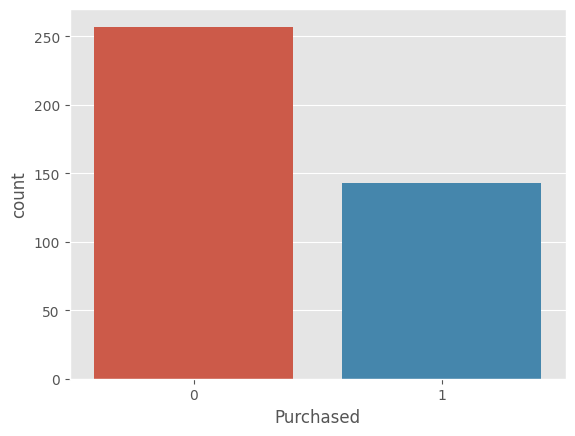

In [ ]:
sns.countplot(data=df, x='Purchased');

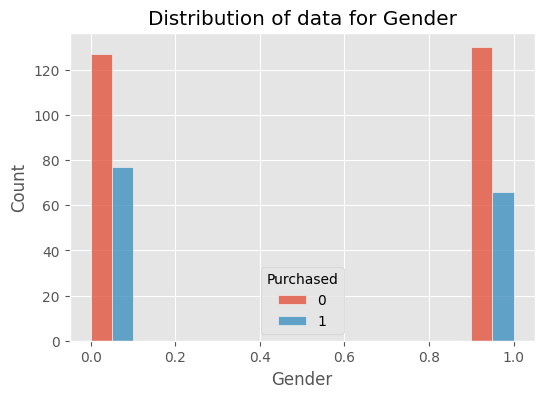

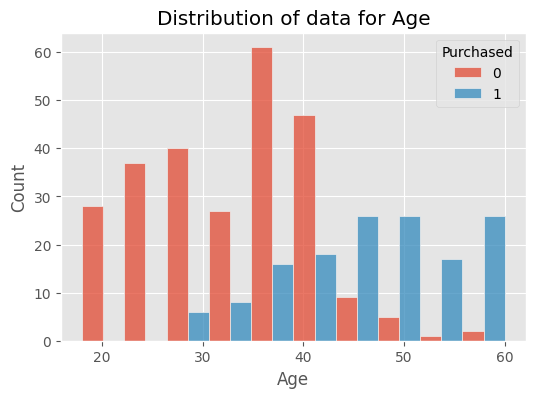

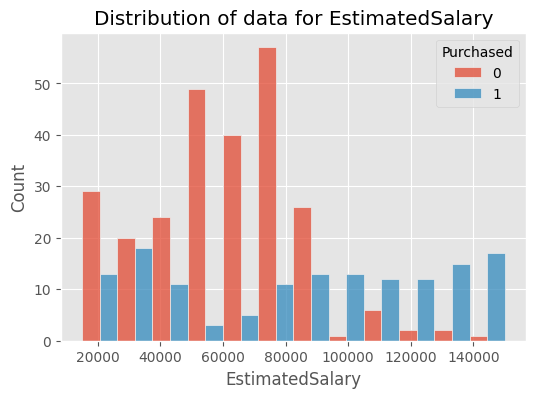

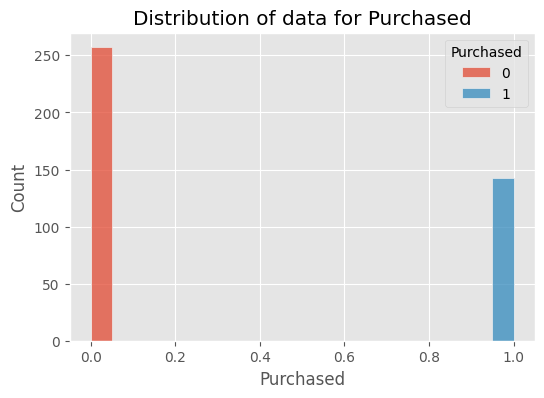

In [ ]:
for col in df.columns[1:]:
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))  # Change the number of subplots to 1
    sns.histplot(data=df, x=col, hue='Purchased', ax=ax, multiple='dodge')
    plt.title(f"Distribution of data for {col}")
    plt.show()


# Features Correlation

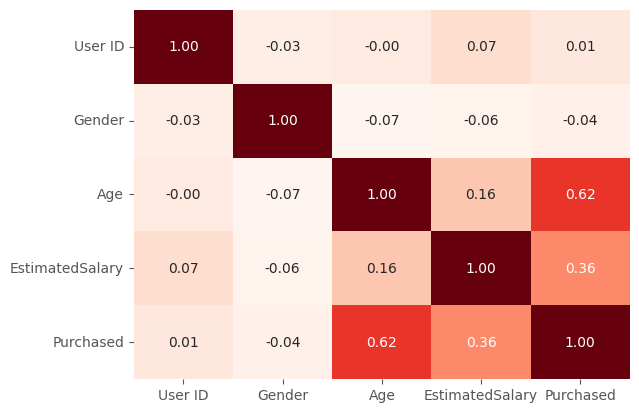

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cbar=None, cmap='Reds');

# Gaussian Naive Bayes Model

In [ ]:
X = df.drop(['User ID', 'Purchased'], axis=1)
y = df['Purchased']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=42)

In [ ]:
print(X_train.info())
X_train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 157 to 102
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           280 non-null    int64
 1   Age              280 non-null    int64
 2   EstimatedSalary  280 non-null    int64
dtypes: int64(3)
memory usage: 8.8 KB
None


(280, 3)

In [ ]:
# Cross Validation untuk menghindari overfitting
model = GaussianNB()
cv_scores = cross_val_score(model, X_train, y_train, cv=3)
y_pred_val = cross_val_predict(model, X_train, y_train, cv=3, n_jobs=-1)

# y_train adalah true label
accuracy = accuracy_score(y_train, y_pred_val)
print("Accuracy:", accuracy)

# Display cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores)}')
print(f'Variance of CV Scores: {np.var(cv_scores)}')

Accuracy: 0.8642857142857143
Cross-Validation Scores: [0.86170213 0.86021505 0.87096774]
Mean CV Score: 0.8642949744528331
Variance of CV Scores: 2.2631477734188015e-05


The accuracy score for Gaussian Naive Bayes is: 0.925
Recall: 0.830
Precision: 0.975
F1 Score: 0.897
Confusion Matrix:


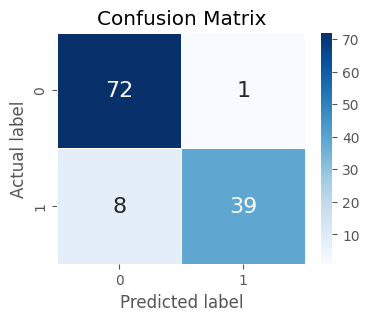

y_pred : 
0    80
1    40
dtype: int64
y_test : 
0    73
1    47
Name: Purchased, dtype: int64
ROC-AUC Score: 0.908


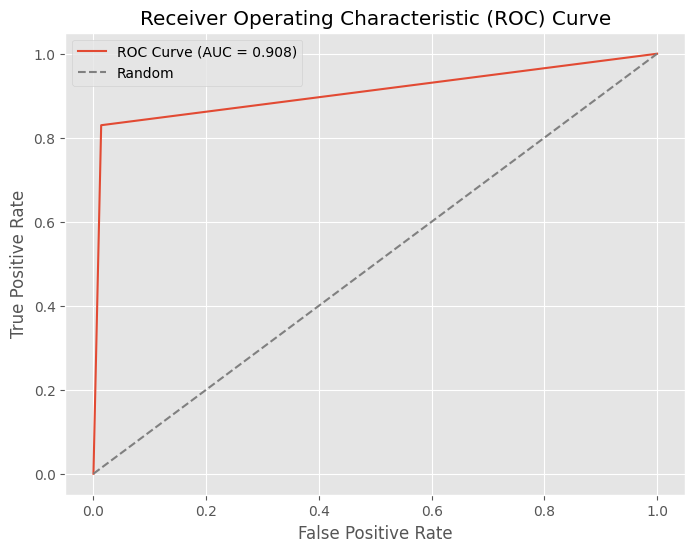

In [ ]:
# Fit the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Accuracy
'''Mengukur sejauh mana model dapat mengklasifikasikan data dengan benar secara keseluruhan.'''
acc = accuracy_score(y_test, y_pred)
print(f'The accuracy score for Gaussian Naive Bayes is: {acc:.3f}')

# Recall
'''Mengukur sejauh mana model dapat mengidentifikasi semua instance positif yang seharusnya diidentifikasi. (true positive over all actual positives)'''
'''Recall = True Positive / (True Positive + False Negative)'''
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.3f}')

# Precision
'''Mengukur seberapa baik model dapat mengidentifikasi instance yang benar-benar positif. (true positive over all positive predictions)'''
'''Precision = True Positive / (True Positive + False Positive)'''
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.3f}')

# F1 Score
'''Merupakan rata-rata harmonik antara recall dan precision, memberikan gambaran holistik tentang kinerja model.'''
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.3f}')

# Confusion Matrix
'''Menyajikan informasi lebih rinci tentang performa model dengan menunjukkan jumlah true positive, true negative, false positive, dan false negative.'''
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
# Display Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

y_pred_df = pd.DataFrame(y_pred)
print(f'y_pred : \n{y_pred_df.value_counts()}')
print(f'y_test : \n{y_test.value_counts()}')

# ROC-AUC Score
'''Mengukur kemampuan model untuk membedakan antara kelas positif dan negatif di berbagai nilai ambang batas.'''
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc:.3f}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

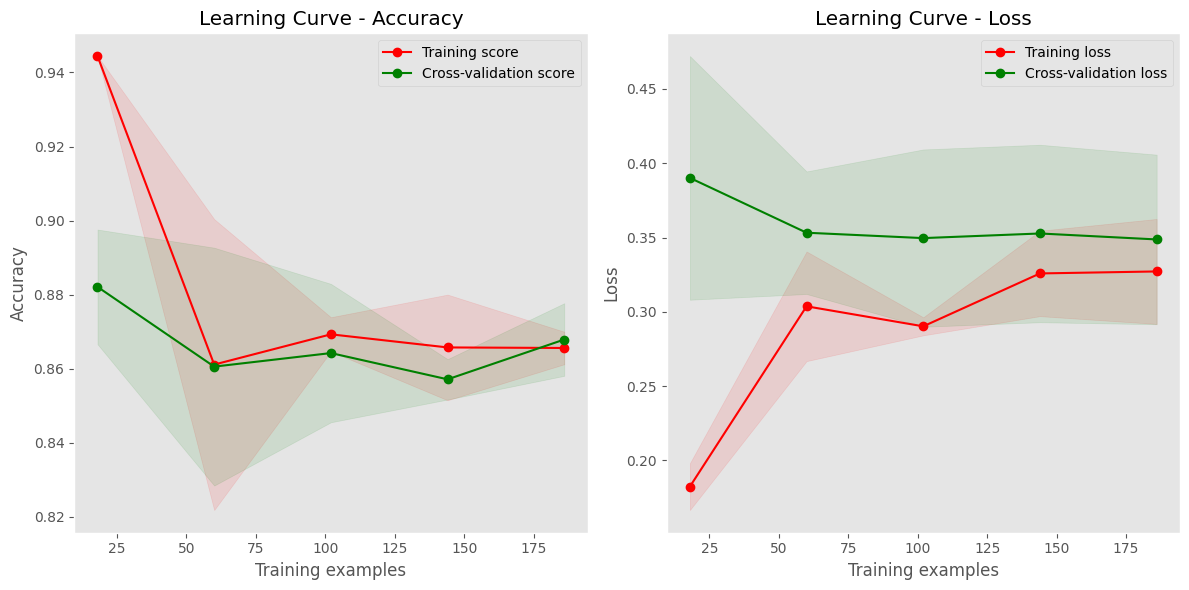

In [ ]:
from sklearn.model_selection import learning_curve

# Create a function to plot the learning curve with loss (untuk mengetahui bias & varians pada model, menentukan apakah model overfitting, good fitting, atau underfitting)
def plot_learning_curve_with_loss(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(12, 6))

    # Plotting the learning curve for accuracy
    plt.subplot(1, 2, 1)
    plt.title(f"{title} - Accuracy")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

    # Plotting the learning curve for loss
    plt.subplot(1, 2, 2)
    plt.title(f"{title} - Loss")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Loss")
    train_sizes, train_losses, test_losses = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_log_loss')
    train_losses_mean = -np.mean(train_losses, axis=1)
    train_losses_std = np.std(train_losses, axis=1)
    test_losses_mean = -np.mean(test_losses, axis=1)
    test_losses_std = np.std(test_losses, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_losses_mean - train_losses_std,
                     train_losses_mean + train_losses_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_losses_mean - test_losses_std,
                     test_losses_mean + test_losses_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_losses_mean, 'o-', color="r", label="Training loss")
    plt.plot(train_sizes, test_losses_mean, 'o-', color="g", label="Cross-validation loss")
    plt.legend(loc="best")

    plt.tight_layout()
    plt.show()

# Plot the learning curve with accuracy and loss
plot_learning_curve_with_loss(GaussianNB(), "Learning Curve", X_train, y_train, cv=3, n_jobs=-1)

In [ ]:
# X_train contains the features used for training
features = X_train.columns

# y_pred_val contains the predicted labels
train_data = pd.concat([X_train, y_train], axis=1)
results = train_data.copy()
results['y_pred_val'] = y_pred_val
results.head()

,Gender,Age,EstimatedSalary,Purchased,y_pred_val
157,1,29,75000,0,0
109,0,38,80000,0,0
17,1,45,26000,1,0
347,0,54,108000,1,1
24,1,46,23000,1,1


<Figure size 1200x400 with 0 Axes>

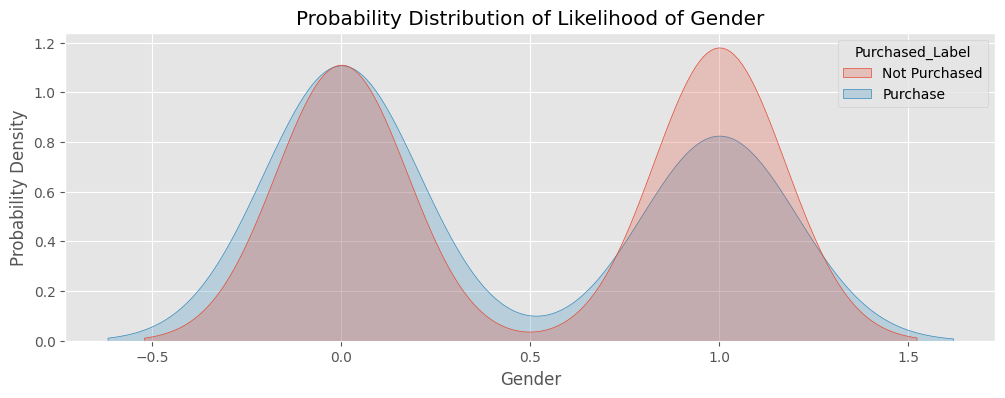

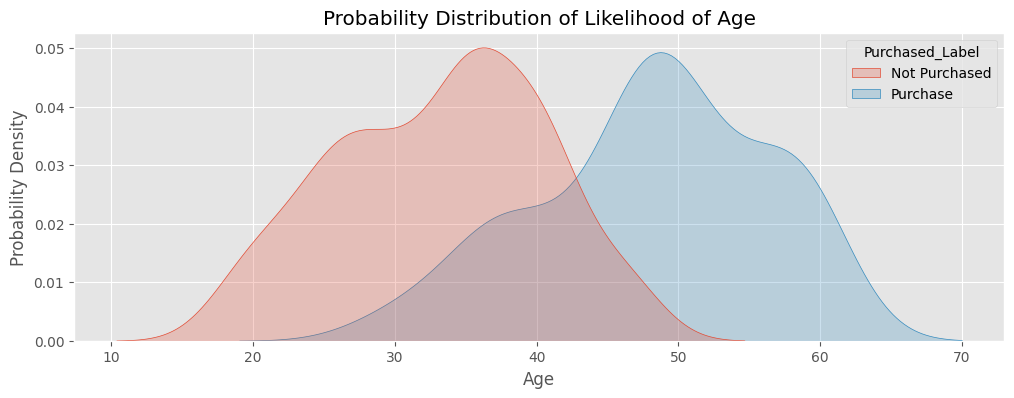

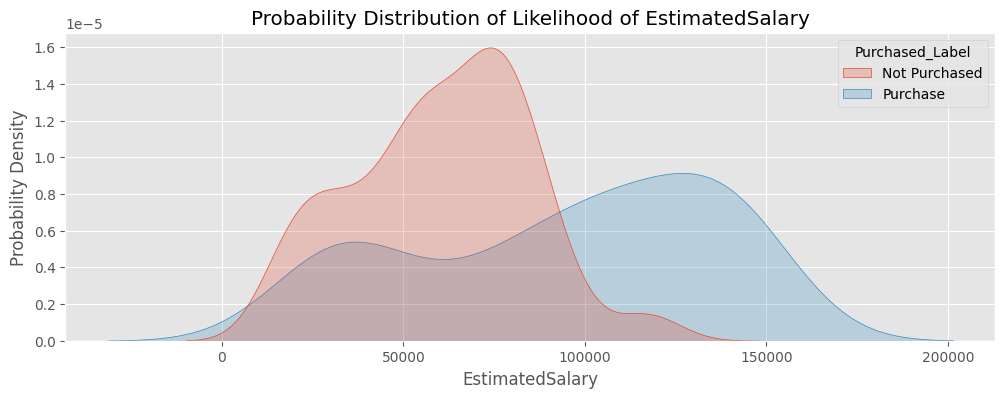

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 4))
results['Purchased_Label'] = results['y_pred_val'].map({0: 'Not Purchased', 1: 'Purchase'})

# Iterate through each feature and create a separate plot
for feature in features:
    plt.figure(figsize=(12, 4))
    sns.kdeplot(data=results, x=feature, hue='Purchased_Label', fill=True, common_norm=False)
    plt.title(f'Probability Distribution of Likelihood of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Probability Density')
    plt.show()

In [ ]:
gender = int(input("Masukkan jenis kelamin (0 untuk perempuan, 1 untuk laki-laki): "))
age = int(input("Masukkan usia: "))
estimated_salary = int(input("Masukkan perkiraan gaji: "))

Masukkan jenis kelamin (0 untuk perempuan, 1 untuk laki-laki): 1
Masukkan usia: 30
Masukkan perkiraan gaji: 50000


In [ ]:
# Define a single data point for prediction
single_data = pd.DataFrame({
    'Gender': [gender],
    'Age': [age],
    'EstimatedSalary': [estimated_salary]
})
# Predict probabilities for each class
proba = model.predict_proba(single_data)

# Display the predicted probabilities
class_labels = model.classes_

for label, prob in zip(class_labels, proba[0]):
    decoded_label = 'Purchased' if label == 1 else 'Not Purchased'
    print(f'P({decoded_label}|Gender={gender}, Age={age}, Estimated Salary = {estimated_salary})": {prob}')
pred = model.predict(single_data)
decoded_class = 'akan membeli' if pred == 1 else 'tidak akan membeli'
print('\n')
print(f'Orang dengan karakteristik tersebut diprediksi {decoded_class} produk dari iklan')



P(Not Purchased|Gender=1, Age=30, Estimated Salary = 50000)": 0.9583537032868742
P(Purchased|Gender=1, Age=30, Estimated Salary = 50000)": 0.04164629671312644


Orang dengan karakteristik tersebut diprediksi tidak akan membeli produk dari iklan
